In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
import os
import glob
import numpy as np
import pandas as pd
import PIL
from random import sample, seed
import csv
import pubchempy as pcp
import matplotlib.pyplot as plt
from itertools import chain
%matplotlib inline
from rdkit.Chem.SaltRemover import SaltRemover
from skmultilearn.cluster.igraph import IGraphLabelGraphClusterer
import igraph as ig

In [39]:
# stuff for exploring the classes
from skmultilearn.model_selection.measures import get_combination_wise_output_matrix
from skmultilearn.dataset import load_dataset
from collections import Counter
from skmultilearn.model_selection import iterative_train_test_split, iterative_stratification
from sklearn.preprocessing import MultiLabelBinarizer
from skmultilearn.cluster import LabelCooccurrenceGraphBuilder

# Explore the classes in the multiclass data

In [3]:
df = pd.read_csv("/home/jgmeyer2/drugclass/multiclass_data/all_chem_df.csv")

In [4]:
df.head()

,image_name,tags,smiles
0,pics/0,dermatologic,CC(=O)NC1C(O)OC(CO)C(O)C1O
1,pics/1,antiinfective,CCC[C@@]1(CCc2ccccc2)CC(O)=C([C@H](CC)c2cccc(N...
2,pics/2,antiinfective,CCCCC(C)C(=O)OC1C(C)C(CC)OC2(CC3CC(C/C=C(\C)CC...
3,pics/3,antineoplastic,COc1cc2c(c(OC)c1OC)-c1c(cc3c(c1OC)OCO3)C[C@H](...
4,pics/4,antiinfective respiratorysystem,CC(=O)N[C@@H](CS)C(=O)[O-]


In [5]:
df.shape

(8336, 3)

In [6]:
scl = [x.split() for x in df['tags']]

In [132]:
df['Col3'] = scl
df.head()
#mlb.fit_transform(df.pop('Col3'))

,image_name,tags,smiles,Col3
0,pics/0,dermatologic,CC(=O)NC1C(O)OC(CO)C(O)C1O,[dermatologic]
1,pics/1,antiinfective,CCC[C@@]1(CCc2ccccc2)CC(O)=C([C@H](CC)c2cccc(N...,[antiinfective]
2,pics/2,antiinfective,CCCCC(C)C(=O)OC1C(C)C(CC)OC2(CC3CC(C/C=C(\C)CC...,[antiinfective]
3,pics/3,antineoplastic,COc1cc2c(c(OC)c1OC)-c1c(cc3c(c1OC)OCO3)C[C@H](...,[antineoplastic]
4,pics/4,antiinfective respiratorysystem,CC(=O)N[C@@H](CS)C(=O)[O-],"[antiinfective, respiratorysystem]"


In [133]:
# to add the columns with new classes
#df2 = df.drop('Col3', 1).join(df.Col3.str.join('|').str.get_dummies())

In [134]:
#df2.to_csv("/home/jgmeyer2/drugclass/multiclass_data/allchems_wclass.csv", index=False)

In [135]:
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(scl)

In [136]:
mlb.classes_

array(['antiinfective', 'antiinflammatory', 'antineoplastic', 'cardio',
       'cns', 'dermatologic', 'gastrointestinal', 'hematologic',
       'lipidregulating', 'reproductivecontrol', 'respiratorysystem',
       'urological'], dtype=object)

In [137]:
y

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [138]:
Counter(combination for row in get_combination_wise_output_matrix(y, order=6) for combination in row)

Counter({(5, 5, 5, 5, 5, 5): 226,
         (0, 0, 0, 0, 0, 0): 2923,
         (2, 2, 2, 2, 2, 2): 1642,
         (0, 0, 0, 10, 10, 10): 11,
         (0, 0, 0, 0, 0, 10): 11,
         (0, 10, 10, 10, 10, 10): 11,
         (0, 0, 10, 10, 10, 10): 11,
         (10, 10, 10, 10, 10, 10): 281,
         (0, 0, 0, 0, 10, 10): 11,
         (4, 4, 4, 4, 4, 4): 1528,
         (7, 7, 7, 7, 7, 7): 462,
         (3, 3, 4, 6, 6, 6): 4,
         (3, 3, 3, 4, 4, 4): 156,
         (3, 3, 3, 4, 6, 6): 4,
         (3, 3, 3, 3, 6, 6): 20,
         (3, 3, 4, 4, 4, 4): 156,
         (4, 4, 4, 4, 6, 6): 104,
         (3, 3, 6, 6, 6, 6): 20,
         (3, 3, 3, 6, 6, 6): 20,
         (3, 3, 3, 3, 3, 6): 20,
         (3, 3, 3, 4, 4, 6): 4,
         (6, 6, 6, 6, 6, 6): 490,
         (3, 3, 3, 3, 4, 6): 4,
         (4, 4, 6, 6, 6, 6): 104,
         (3, 3, 4, 4, 6, 6): 4,
         (3, 4, 4, 4, 4, 4): 156,
         (3, 4, 4, 4, 6, 6): 4,
         (4, 4, 4, 6, 6, 6): 104,
         (4, 6, 6, 6, 6, 6): 104,
         (3

In [139]:
#from skmultilearn.dataset import load_dataset
#X_train, y_train, feature_names, label_names = load_dataset('emotions', 'train')
#X_test, y_test, _, _ = load_dataset('emotions', 'test')

In [140]:
y.shape

(8336, 12)

In [141]:
len(y)

8336

In [142]:
graph_builder = LabelCooccurrenceGraphBuilder(weighted=True, include_self_edges=False)
edge_map = graph_builder.transform(y)
print("{} labels, {} edges".format(len(mlb.classes_), len(edge_map)))
print(edge_map)

12 labels, 53 edges
{(0, 10): 11.0, (3, 4): 156.0, (3, 6): 20.0, (4, 6): 104.0, (3, 7): 152.0, (0, 2): 320.0, (0, 5): 43.0, (2, 5): 36.0, (0, 1): 49.0, (1, 2): 45.0, (6, 8): 12.0, (3, 8): 9.0, (0, 6): 65.0, (1, 6): 38.0, (2, 9): 28.0, (3, 10): 67.0, (4, 10): 82.0, (0, 4): 25.0, (1, 7): 34.0, (2, 4): 33.0, (0, 3): 41.0, (0, 7): 13.0, (4, 7): 12.0, (7, 10): 5.0, (1, 5): 32.0, (1, 10): 41.0, (5, 10): 5.0, (9, 10): 11.0, (3, 11): 12.0, (1, 4): 29.0, (2, 6): 23.0, (1, 3): 45.0, (2, 3): 41.0, (3, 9): 26.0, (1, 9): 11.0, (0, 9): 5.0, (7, 8): 7.0, (0, 8): 7.0, (0, 11): 7.0, (2, 7): 17.0, (7, 9): 4.0, (5, 9): 5.0, (8, 9): 1.0, (4, 5): 3.0, (5, 6): 6.0, (4, 8): 6.0, (6, 7): 6.0, (6, 10): 4.0, (4, 9): 4.0, (6, 9): 2.0, (7, 11): 1.0, (2, 8): 1.0, (1, 8): 1.0}


In [143]:
from skmultilearn.cluster.networkx import NetworkXLabelGraphClusterer

# we define a helper function for visualization purposes
def to_membership_vector(partition):
    return {
        member :  partition_id
        for partition_id, members in enumerate(partition)
        for member in members
    }

In [144]:
clusterer = NetworkXLabelGraphClusterer(graph_builder, method='louvain')


In [145]:
clusterer_igraph = IGraphLabelGraphClusterer(graph_builder=graph_builder, method='walktrap')
partition = clusterer_igraph.fit_predict(df2['smiles'], y)
partition

array([list([0, 2, 5]), list([1, 3, 4, 6, 7, 8, 9, 10, 11])], dtype=object)

In [146]:
mlb.classes_

array(['antiinfective', 'antiinflammatory', 'antineoplastic', 'cardio',
       'cns', 'dermatologic', 'gastrointestinal', 'hematologic',
       'lipidregulating', 'reproductivecontrol', 'respiratorysystem',
       'urological'], dtype=object)

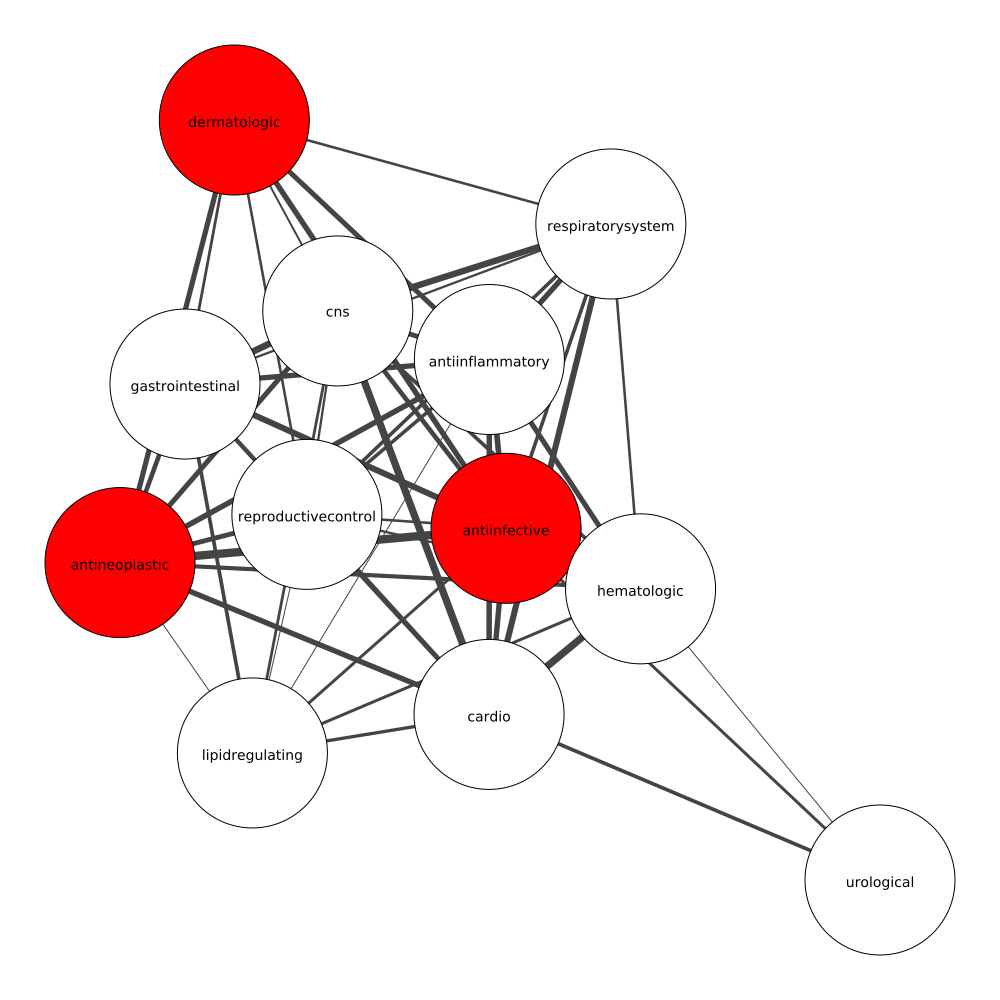

In [147]:
colors = ['red', 'white', 'blue', 'green']
membership_vector = to_membership_vector(partition)
visual_style = {
    "vertex_size" : 150,
    "vertex_label": [x for x in mlb.classes_],
    "edge_width" : [np.log2(x+1) for x in clusterer_igraph.graph_.es['weight']],
    "vertex_color": [colors[membership_vector[i]] for i in range(y.shape[1])],
    "bbox": (1000,1000),
    "margin": 120,
    "layout": clusterer_igraph.graph_.layout_fruchterman_reingold(),
    "autocurve":False,
    "edge_curved":0.0
}

def testplot(graph, name):
    graph.vs['label'] = graph.vs['name']
    out = ig.plot(clusterer_igraph.graph_, **visual_style)
    out.save(name + '_allmolecules.png')
    
testplot(clusterer_igraph.graph_, '/home/jgmeyer2/drugclass/multiclass_data/force')
ig.plot(clusterer_igraph.graph_, **visual_style)
#ig.write(clusterer_igraph.graph_, filename="test.svg")

In [27]:
membership_vector

{0: 0, 2: 0, 5: 0, 1: 1, 3: 1, 4: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1}

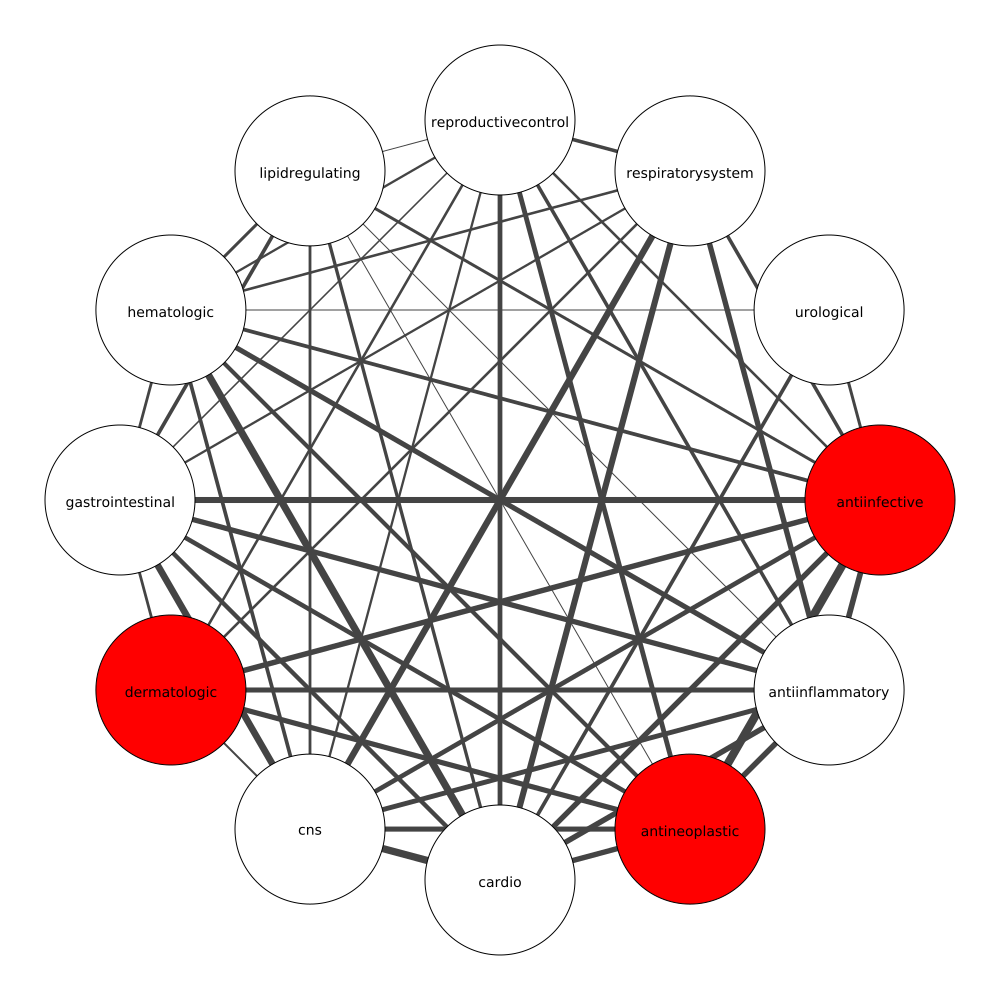

In [29]:
colors = ['red', 'white', 'blue']
membership_vector = to_membership_vector(partition)
visual_style = {
    "vertex_size" : 150,
    "vertex_label": [x for x in mlb.classes_],
    "edge_width" : [np.log2(x+1) for x in clusterer_igraph.graph_.es['weight']],
    "vertex_color": [colors[membership_vector[i]] for i in range(y.shape[1])],
    "bbox": (1000,1000),
    "margin": 120,
    "layout": clusterer_igraph.graph_.layout_circle(),
    "autocurve":False,
    "edge_curved":0.0
}

def testplot(graph, name):
    graph.vs['label'] = graph.vs['name']
    out = ig.plot(clusterer_igraph.graph_, **visual_style)
    out.save(name + '_allmolecules.png')
    
testplot(clusterer_igraph.graph_, '/home/jgmeyer2/drugclass/multiclass_data/circle')
ig.plot(clusterer_igraph.graph_, **visual_style)
#ig.write(clusterer_igraph.graph_, filename="test.svg")

## The same for the test set

In [30]:
from skmultilearn.cluster.graphtool import GraphToolLabelGraphClusterer, StochasticBlockModel

In [31]:
#from skmultilearn.cluster import GraphToolLabelClusterer

In [32]:
from skmultilearn.cluster.graphtool import *

In [33]:
GraphToolLabelGraphClusterer

skmultilearn.cluster.graphtool.GraphToolLabelGraphClusterer

In [34]:
model = StochasticBlockModel(nested=False, use_degree_correlation=True, allow_overlap=False, weight_model='real-normal')

In [36]:
clusterer_graphtool = GraphToolLabelGraphClusterer(graph_builder=graph_builder, model=model)
clusterer_graphtool.fit_predict(None, y)

ArgumentError: Python argument types in
    graph_tool.libgraph_tool_core.add_edge(GraphInterface, Vertex, Vertex)
did not match C++ signature:
    add_edge(graph_tool::GraphInterface {lvalue}, unsigned long, unsigned long)

# Split based on multiclass membership

In [41]:
# 5% as training
stratifier = iterative_stratification.IterativeStratification(n_splits=2, order=3, sample_distribution_per_fold=[0.95, 0.05])
test5pct_indexes, train_indexes = next(stratifier.split(y, y))

In [42]:
# 10% as training
stratifier = iterative_stratification.IterativeStratification(n_splits=2, order=3, sample_distribution_per_fold=[0.9, 0.1])
test10pct_indexes, train_indexes = next(stratifier.split(y, y))

In [77]:
??iterative_stratification.IterativeStratification

In [43]:
# 20% as training
stratifier = iterative_stratification.IterativeStratification(n_splits=5, order=3, sample_distribution_per_fold=[0.8, 0.2])
test20pct_indexes, train_indexes = next(stratifier.split(y, y))

In [84]:
# 20% as training
stratifier = iterative_stratification.IterativeStratification(n_splits=5, order=3, random_state=1)
f1, train1 = next(stratifier.split(y, y))

In [85]:
allsplits = []
for tmpsplit in stratifier.split(y,y):
    allsplits.append(tmpsplit)

In [122]:
testprep  = stratifier._iter_test_indices(y,y)

In [123]:
allsplits = []
alllist=[]
for test in testprep:
    print(len(test))
    print(test[0:10])
    allsplits.append(test)
    alllist += test

1658
[7716, 63, 4552, 2672, 5588, 6032, 7435, 536, 1181, 1240]
1669
[5811, 2925, 2585, 4819, 4078, 772, 7587, 3300, 1357, 8196]
1673
[1822, 6934, 104, 7274, 7394, 5046, 3711, 7766, 3839, 4369]
1666
[7764, 2838, 2638, 5045, 1961, 3657, 7613, 6488, 2205, 6047]
1670
[11, 2484, 5763, 374, 386, 496, 3570, 8180, 1065, 3504]


In [124]:
alllist

[7716,
 63,
 4552,
 2672,
 5588,
 6032,
 7435,
 536,
 1181,
 1240,
 1251,
 8193,
 4886,
 6750,
 5258,
 5581,
 2660,
 4,
 6833,
 6052,
 4054,
 8290,
 6717,
 5976,
 3189,
 2912,
 533,
 7088,
 6762,
 5189,
 7361,
 4597,
 1152,
 8265,
 8228,
 8073,
 7619,
 7318,
 6842,
 6767,
 6119,
 5901,
 5377,
 4866,
 4742,
 4249,
 3882,
 3669,
 3396,
 3188,
 2637,
 2493,
 2447,
 1430,
 1316,
 805,
 559,
 8213,
 7928,
 6862,
 6632,
 6314,
 5557,
 5074,
 4708,
 4148,
 3383,
 2770,
 2336,
 2077,
 1906,
 1605,
 1040,
 991,
 112,
 8216,
 7614,
 7264,
 6838,
 6441,
 6085,
 5695,
 5132,
 4969,
 4791,
 4562,
 3668,
 3609,
 3255,
 2632,
 2481,
 2086,
 2061,
 1759,
 1593,
 1392,
 996,
 752,
 507,
 188,
 45,
 7935,
 6285,
 4492,
 2615,
 2584,
 1484,
 8062,
 6095,
 4199,
 3771,
 1946,
 490,
 6533,
 4606,
 2766,
 7793,
 7335,
 4586,
 3770,
 947,
 5166,
 99,
 7696,
 7246,
 7169,
 5802,
 5251,
 4473,
 3912,
 3153,
 2682,
 840,
 6107,
 2295,
 7836,
 5480,
 4541,
 796,
 7718,
 6943,
 4284,
 3687,
 1876,
 1224,
 1015,
 

In [128]:
len(allsplits[0])

1658

In [129]:
VALIDSETS = allsplits

In [131]:
for y in range(0, len(VALIDSETS)):
    idlist = VALIDSETS[y]
    with open('multilabel_iter5fold_' +str(y)+'.csv', 'w') as f:
        writer = csv.writer(f, delimiter=',')
        writer.writerows(map(lambda x: [x], idlist))

In [126]:
len(set(alllist))

8336

In [55]:
y_test = y[test20pct_indexes]

In [56]:
len(y_test)

1670

In [57]:
graph_builder = LabelCooccurrenceGraphBuilder(weighted=True, include_self_edges=False)
edge_map = graph_builder.transform(y_test)
print("{} labels, {} edges".format(len(mlb.classes_), len(edge_map)))
print(edge_map)

12 labels, 48 edges
{(3, 4): 31.0, (3, 6): 4.0, (4, 6): 21.0, (0, 2): 64.0, (3, 7): 30.0, (0, 5): 9.0, (2, 5): 7.0, (0, 1): 10.0, (1, 2): 9.0, (3, 8): 2.0, (0, 6): 13.0, (1, 6): 8.0, (2, 9): 6.0, (3, 10): 13.0, (4, 10): 16.0, (0, 4): 5.0, (1, 7): 7.0, (2, 4): 7.0, (0, 3): 8.0, (0, 7): 3.0, (4, 7): 2.0, (0, 10): 2.0, (7, 10): 1.0, (1, 4): 6.0, (6, 8): 2.0, (1, 3): 9.0, (2, 6): 5.0, (2, 3): 8.0, (9, 10): 2.0, (2, 7): 3.0, (7, 9): 1.0, (1, 5): 6.0, (3, 11): 2.0, (5, 9): 1.0, (7, 8): 1.0, (1, 10): 8.0, (5, 6): 1.0, (3, 9): 5.0, (0, 9): 1.0, (0, 11): 1.0, (1, 9): 2.0, (0, 8): 1.0, (4, 8): 1.0, (6, 7): 1.0, (6, 10): 1.0, (5, 10): 1.0, (4, 9): 1.0, (4, 5): 1.0}


In [58]:
clusterer = NetworkXLabelGraphClusterer(graph_builder, method='louvain')
clusterer_igraph = IGraphLabelGraphClusterer(graph_builder=graph_builder, method='walktrap')
partition = clusterer_igraph.fit_predict(df2['smiles'], y_test)
partition

array([list([0, 2, 5]), list([1, 3, 4, 6, 7, 8, 9, 10, 11])], dtype=object)

In [59]:
y_test.shape[1]

12

In [60]:
to_membership_vector(partition)

{0: 0, 2: 0, 5: 0, 1: 1, 3: 1, 4: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1}

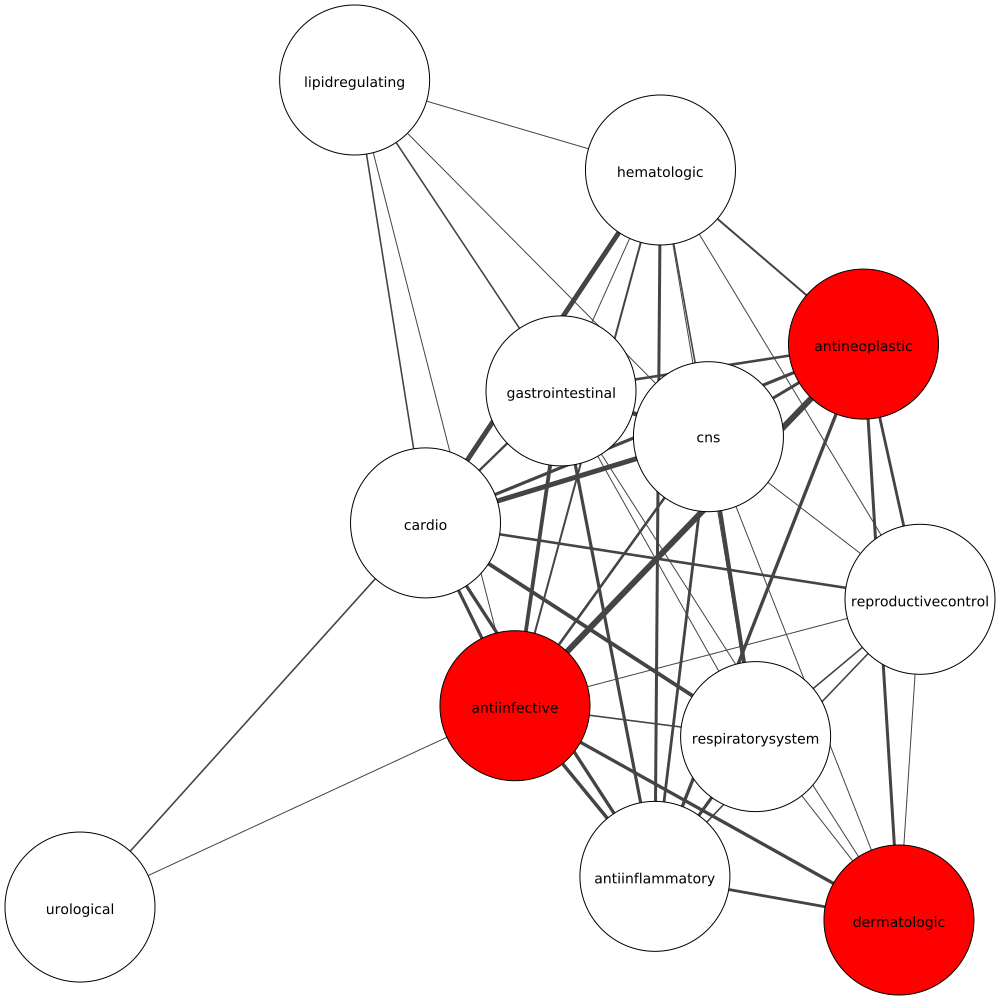

In [61]:
colors = ['red', 'white', 'blue', 'green']
membership_vector = to_membership_vector(partition)
visual_style = {
    "vertex_size" : 150,
    "vertex_label": [x for x in mlb.classes_],
    "edge_width" : [np.log2(x+1) for x in clusterer_igraph.graph_.es['weight']],
    "vertex_color": [colors[membership_vector[i]] for i in range(y_test.shape[1])],
    "bbox": (1000,1000),
    "margin": 80,
    "layout": clusterer_igraph.graph_.layout_fruchterman_reingold(),
    "autocurve":False,
    "edge_curved":0.0
}

def testplot(graph, name):
    graph.vs['label'] = graph.vs['name']
    out = ig.plot(clusterer_igraph.graph_, **visual_style)
    out.save(name + '_20pct_testmolecules.png')
    
testplot(clusterer_igraph.graph_, '/home/jgmeyer2/drugclass/multiclass_data/force')
ig.plot(clusterer_igraph.graph_, **visual_style)


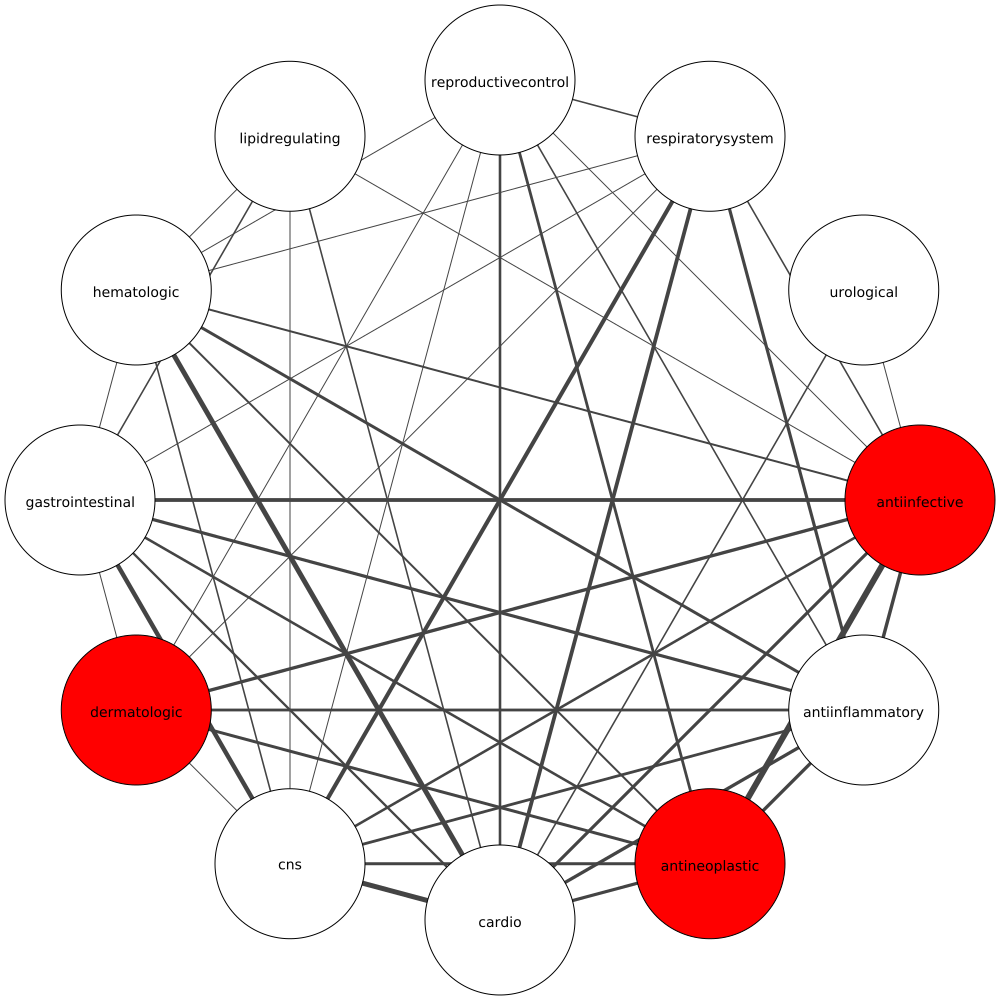

In [62]:
colors = ['red', 'white', 'blue', 'green']
membership_vector = to_membership_vector(partition)
visual_style = {
    "vertex_size" : 150,
    "vertex_label": [x for x in mlb.classes_],
    "edge_width" : [np.log2(x+1) for x in clusterer_igraph.graph_.es['weight']],
    "vertex_color": [colors[membership_vector[i]] for i in range(y_test.shape[1])],
    "bbox": (1000,1000),
    "margin": 80,
    "layout": clusterer_igraph.graph_.layout_circle(),
    "autocurve":False,
    "edge_curved":0.0
}

def testplot(graph, name):
    graph.vs['label'] = graph.vs['name']
    out = ig.plot(clusterer_igraph.graph_, **visual_style)
    out.save(name + '_20pct_testmolecules.png')
    
testplot(clusterer_igraph.graph_, '/home/jgmeyer2/drugclass/multiclass_data/circle')
ig.plot(clusterer_igraph.graph_, **visual_style)


In [64]:


pd.DataFrame({
    'train': Counter(str(combination) for row in get_combination_wise_output_matrix(y, order=2) for combination in row),
    'test' : Counter(str(combination) for row in get_combination_wise_output_matrix(y_test, order=2) for combination in row)
}).fillna(0.0)



,train,test
"(0, 0)",2923,585.0
"(0, 1)",49,10.0
"(0, 10)",11,2.0
"(0, 11)",7,1.0
"(0, 2)",320,64.0
"(0, 3)",41,8.0
"(0, 4)",25,5.0
"(0, 5)",43,9.0
"(0, 6)",65,13.0
"(0, 7)",13,3.0


In [472]:
y_test

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [475]:
test20pct_df = df.iloc[test20pct_indexes]
len(test20pct_df)

1658

In [477]:
train80pct_df = df.drop(test20pct_indexes)
len(train80pct_df)

6617

In [479]:
train80pct_df.to_csv("/home/jgmeyer2/drugclass/multiclass_data/train80pct.csv", index=False)